<a href="https://colab.research.google.com/github/mshapna/Predicting-Concrete-Compressive-Strength/blob/main/Predicting_Concrete_Compresive_Strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset :** Predicting Concrete Compressive Strength using Concrete Sensors

**Domain :** Construction

**Description:** The actual concrete compressive strength (MPa) for a given concrete mixture for a specific number of days was determined from lab.The data has 8 quantitative features (input variables), and 1 quantitative output variable, and 1030 data instances.

**Objective :** Model to predict compressive strength of Concrete using Machine Learning

**Steps :** This Machine Learning project uses feature exploration and selection to predict the strength of high-performance concrete. Used Regression models like Decision tree regressors to find out the most important features and predict the strength. Cross-validation techniques and Grid search were used to tune the parameters for best model performance.

**Skills and Tools :** Regression, Decision trees, feature engineering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from pprint import pprint
from matplotlib import pyplot
import time
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

**Exploratory Data Analysis**

In [ ]:
df  = pd.read_csv('concrete.csv')
df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [ ]:
# data Shape
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 1030
Total Number of columns : 9


In [ ]:
#Data type of each attribute 
df.info

<bound method DataFrame.info of       cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2   

<Axes: >

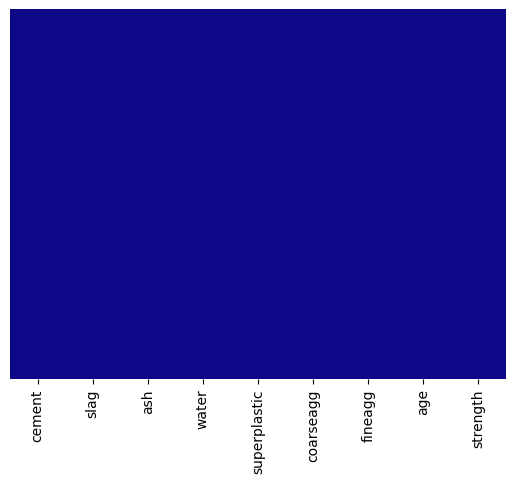

In [ ]:
#Check for Missing Values
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='plasma')

**Inference: There are no null values in the dataset**

In [ ]:
df.apply(lambda x: sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

**Statistics**

In [ ]:
df_transpose = df.describe().T
df_transpose

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

Inference:  Mean and the median is nearly same for all the input features except for Slag, Ash and Age. Most of the input features are normally distributed 

**Outlier Detection**

<Axes: >

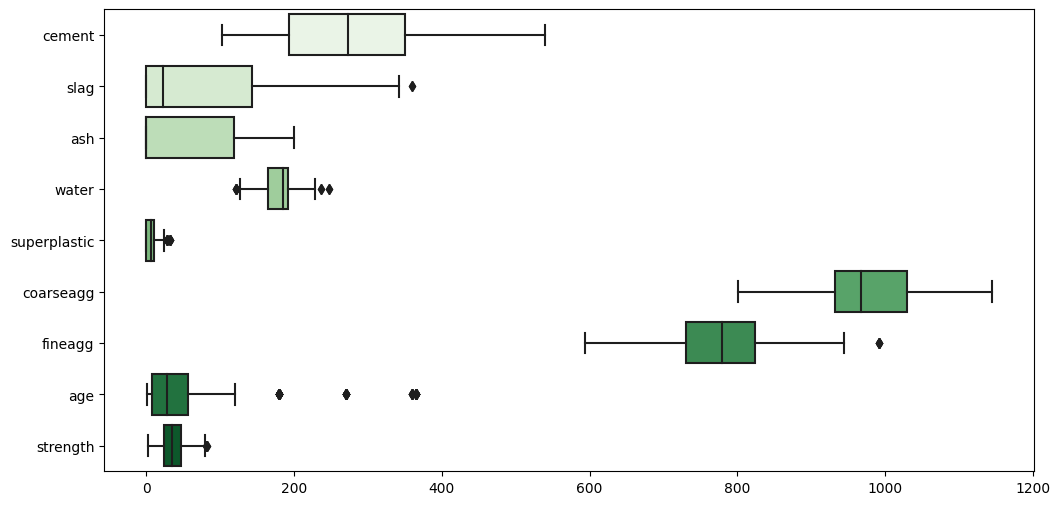

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h", palette="Greens", dodge=False)

**Inference:There are outliers in some of the features.**

**Data Visualization**

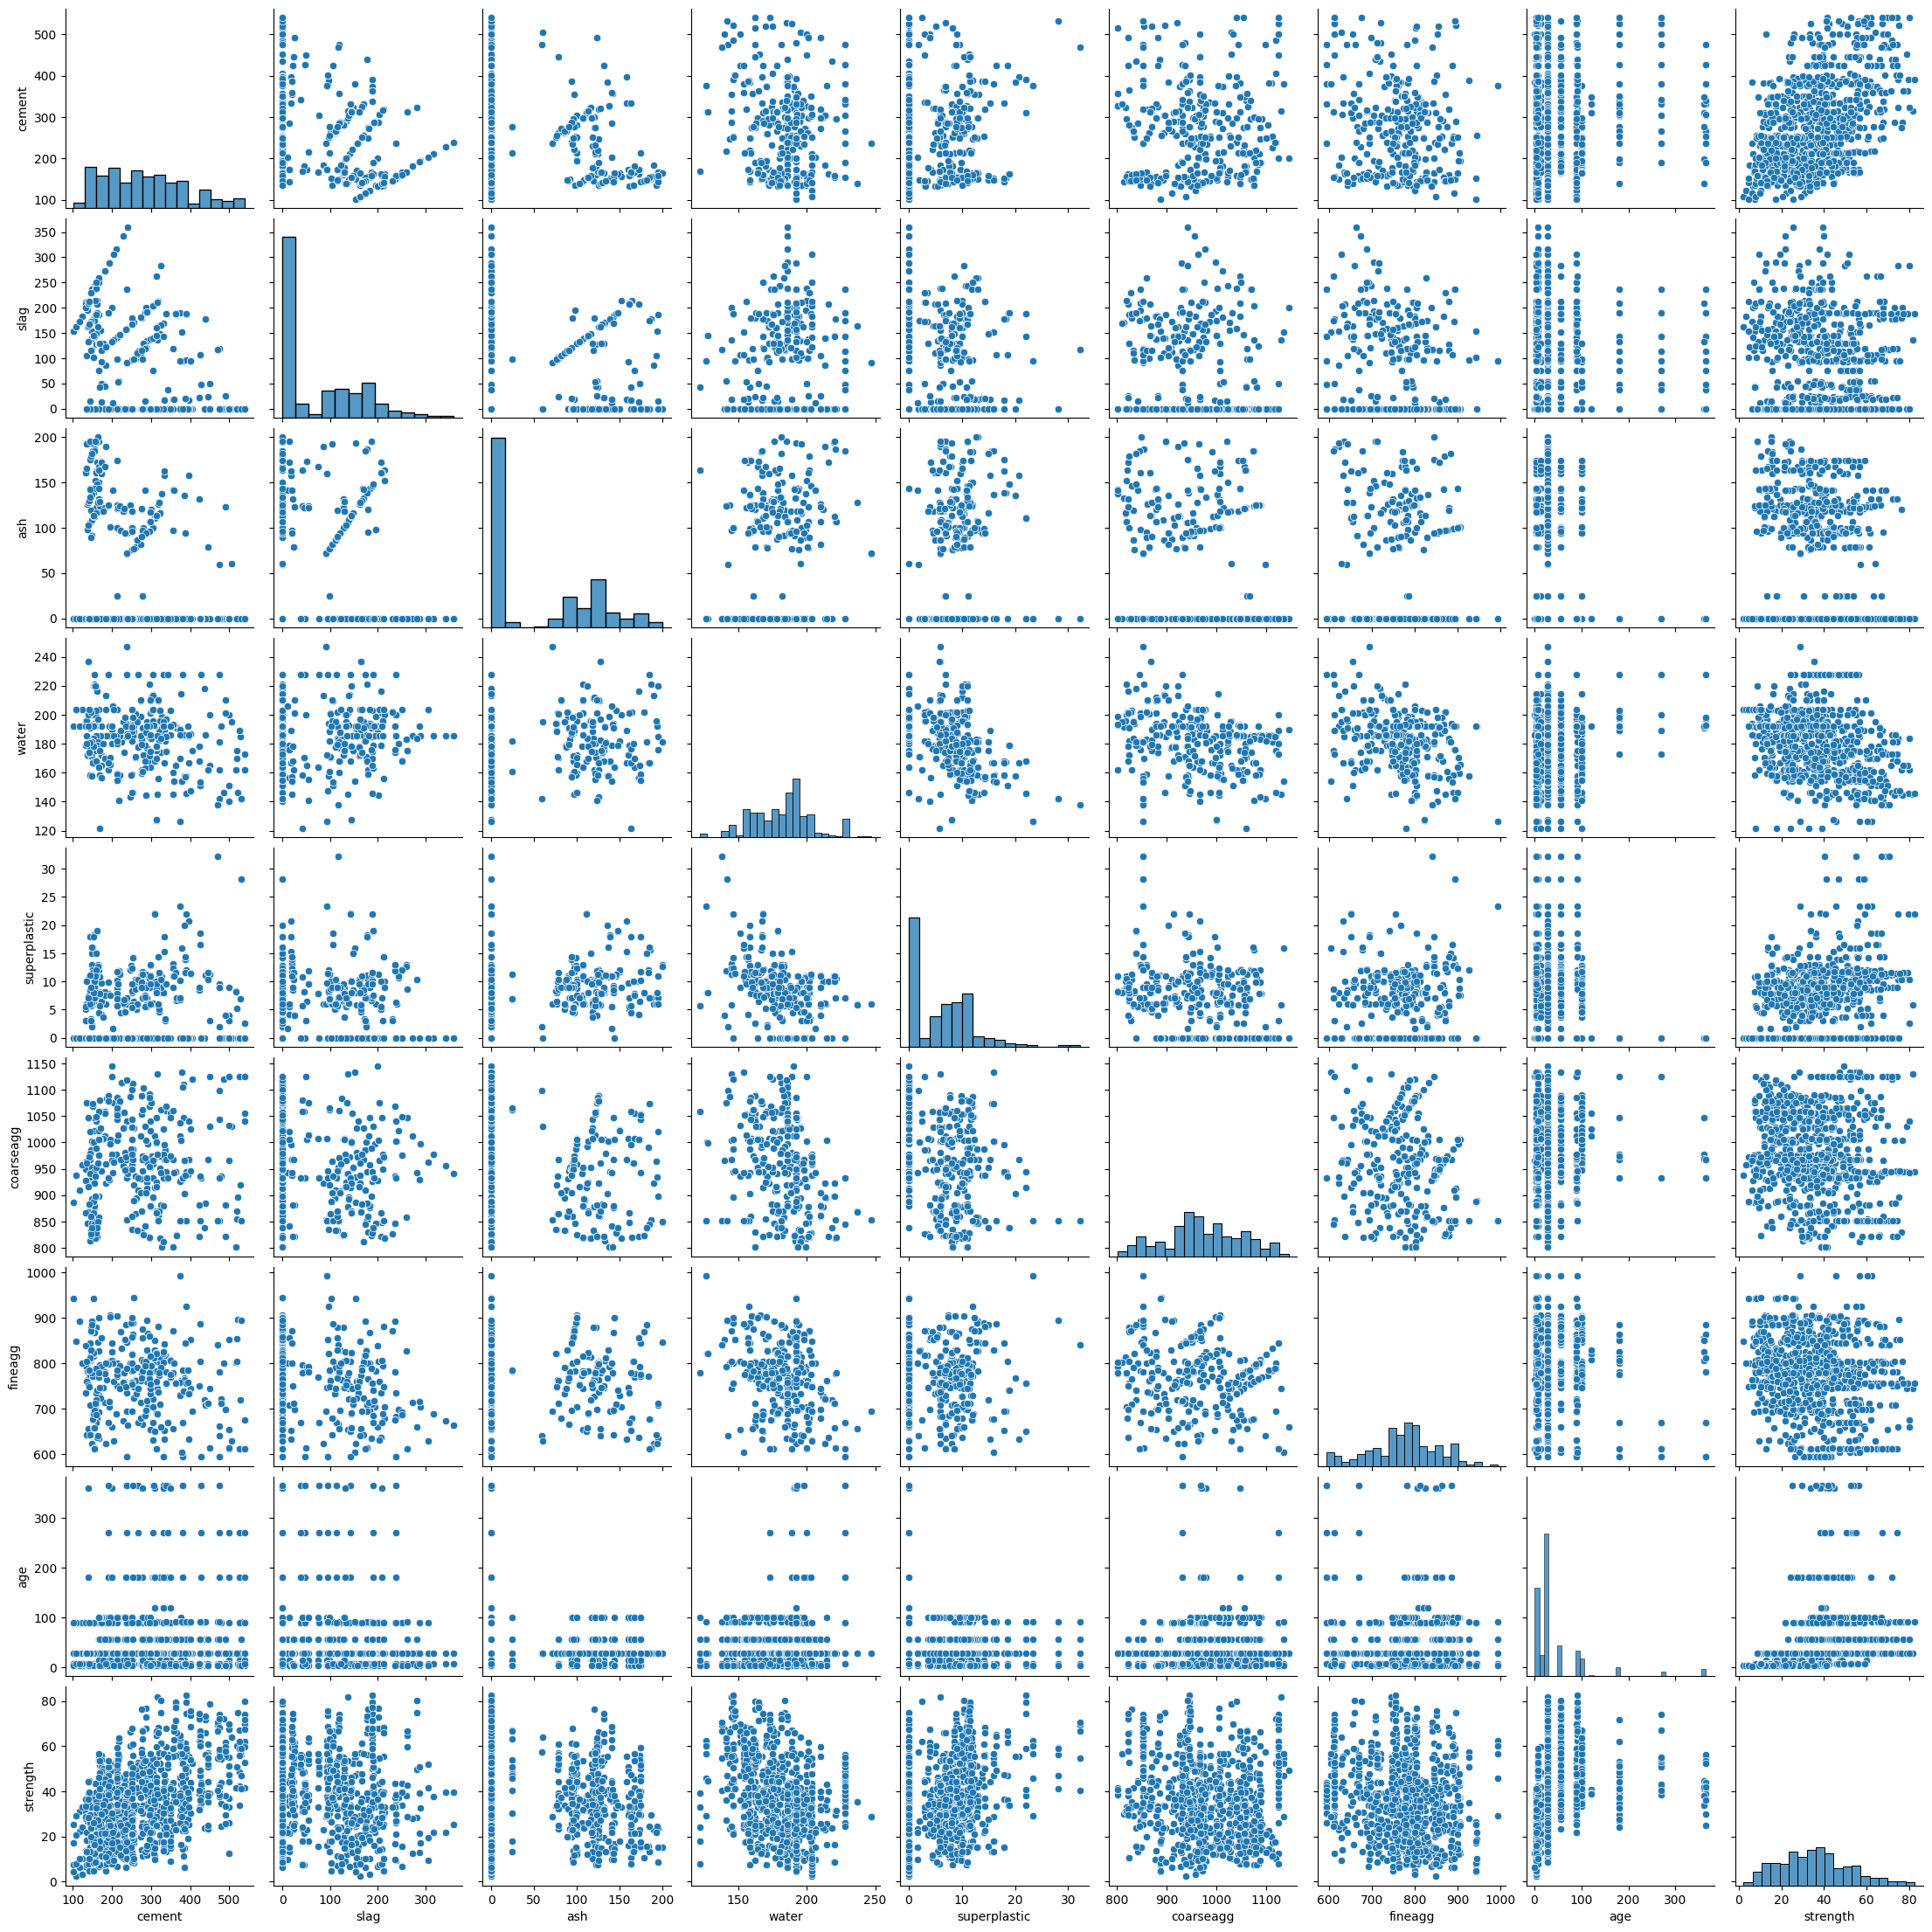

In [ ]:
sns.pairplot(df)
plt.show()

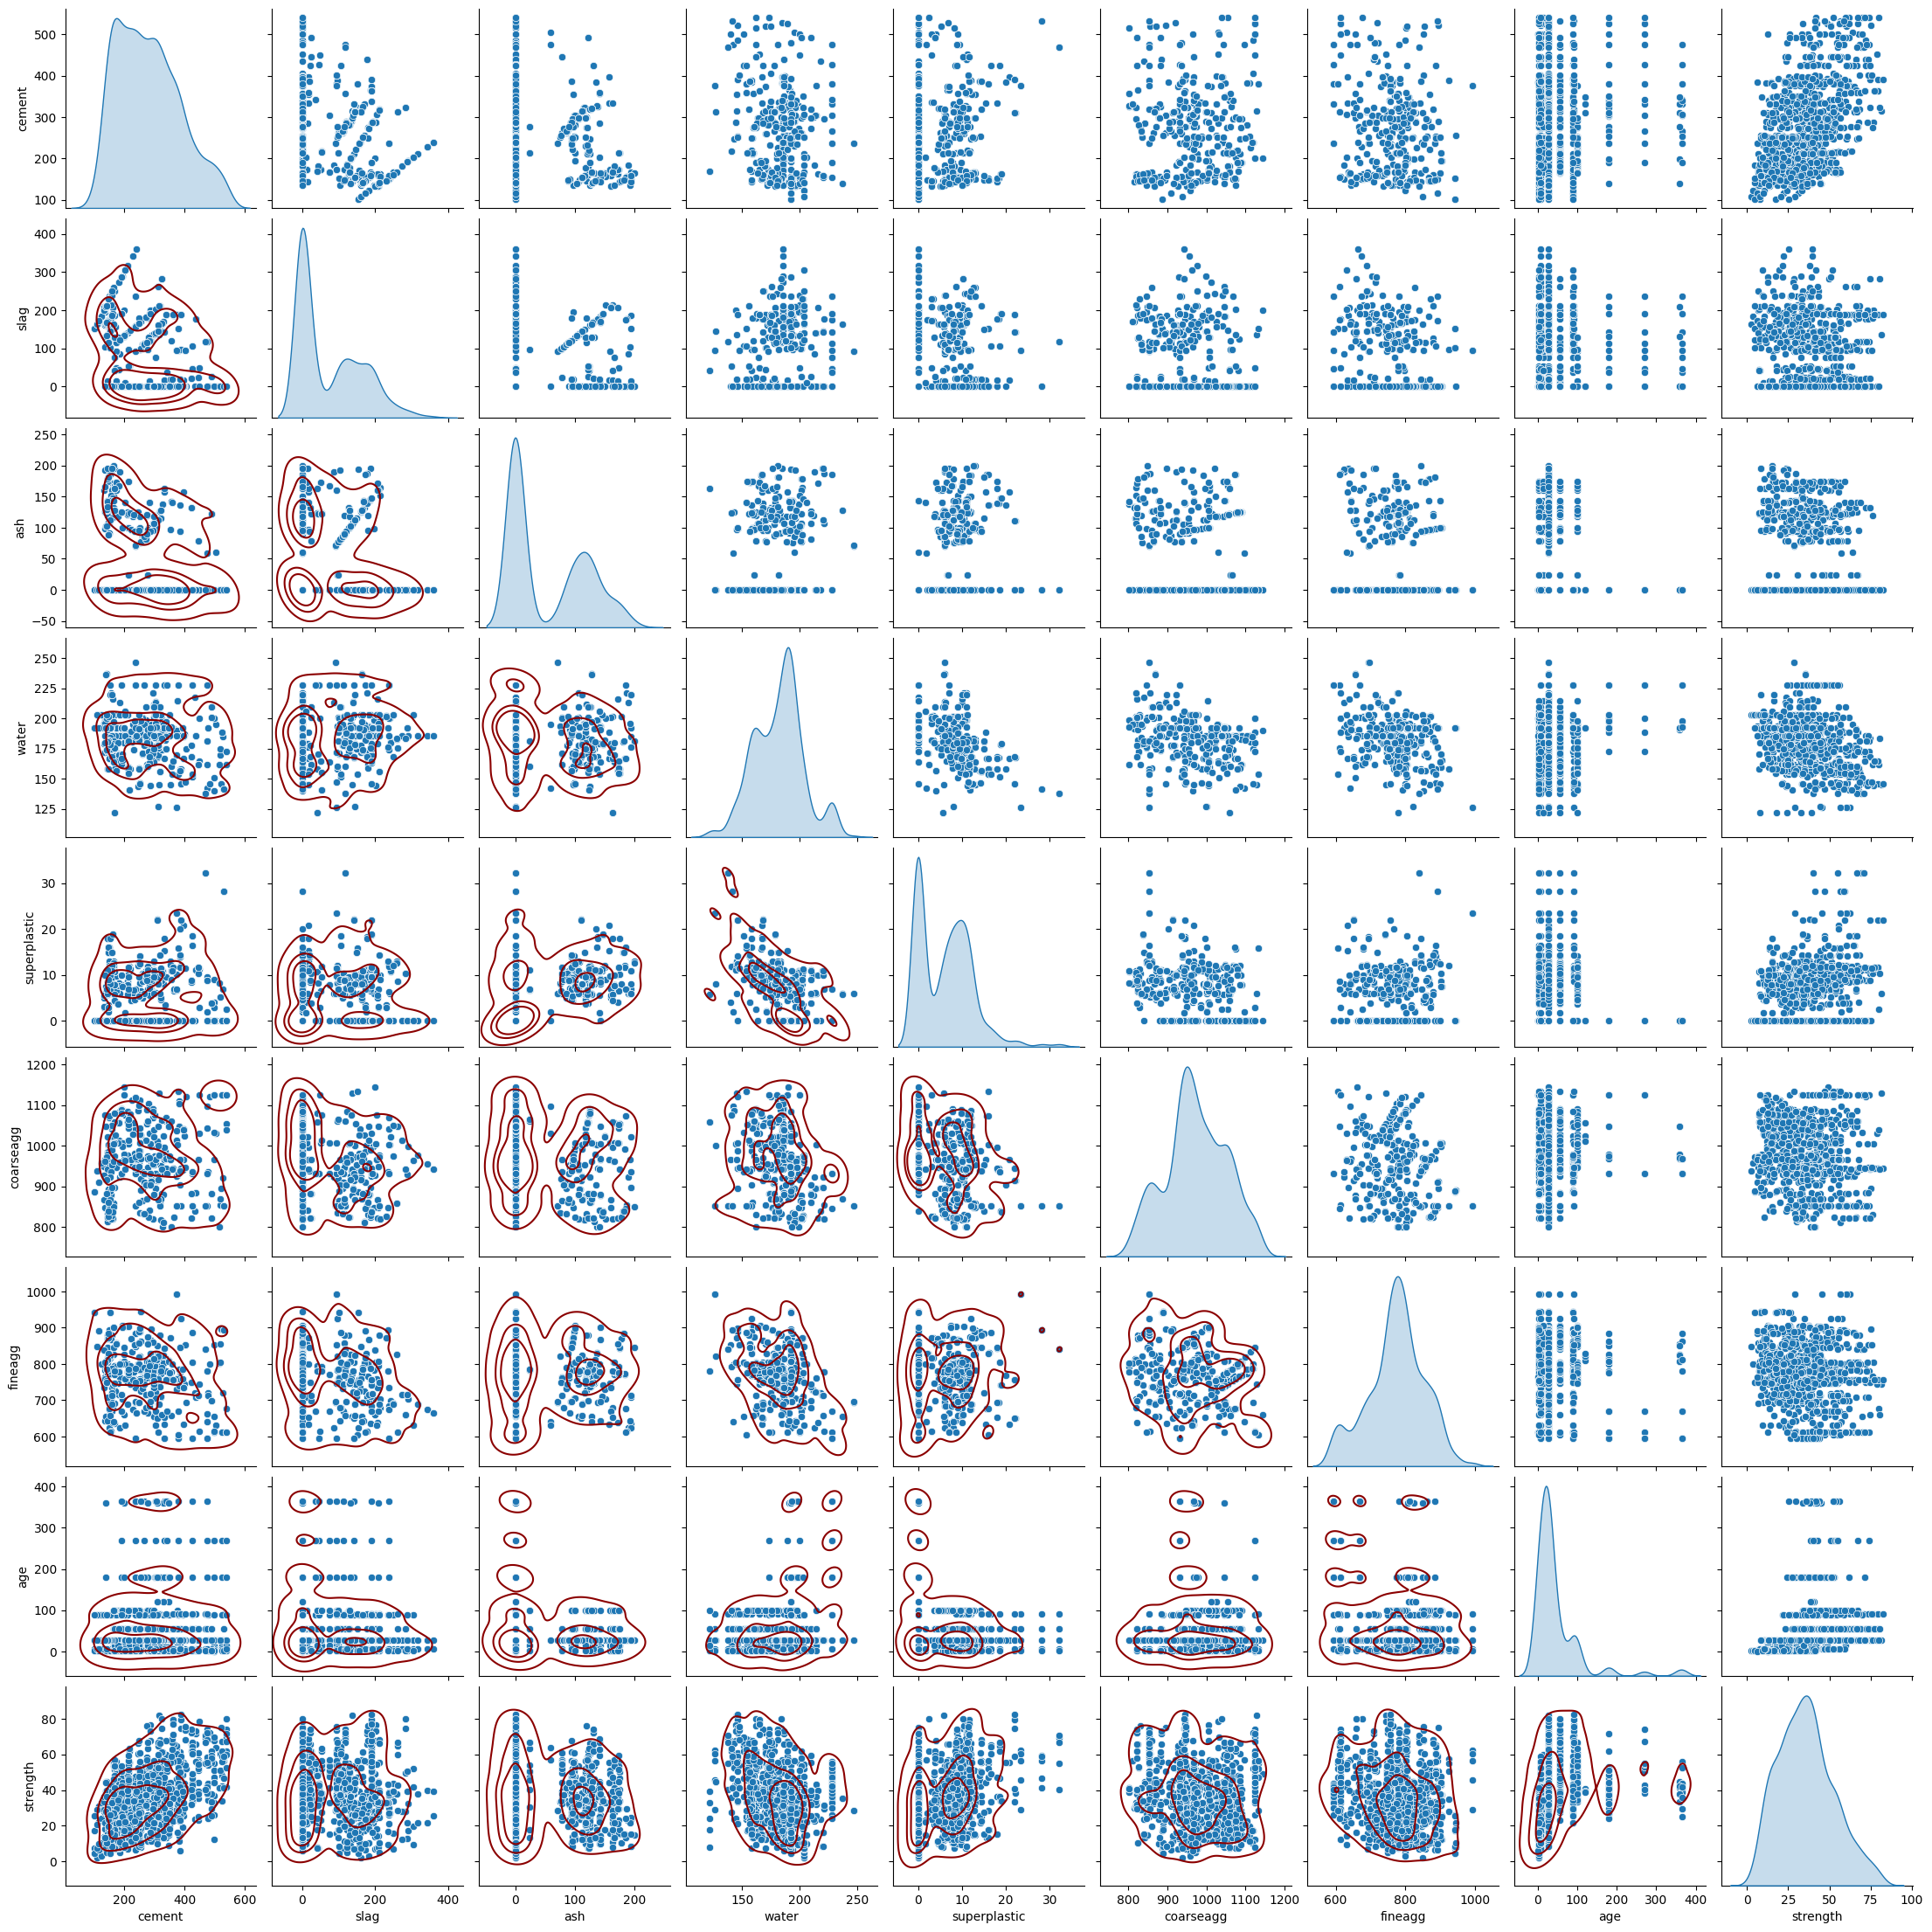

In [ ]:
ax=sns.pairplot(df, diag_kind="kde")

ax.map_lower(sns.kdeplot, levels=4, color = "darkred")

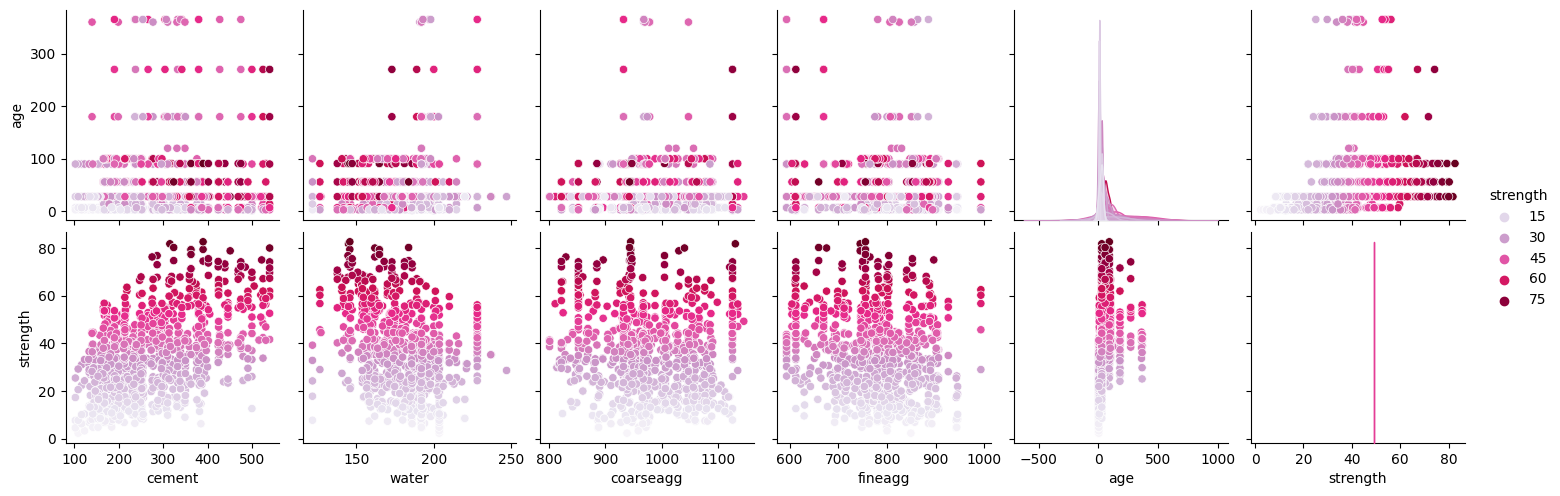

In [ ]:
#sns.set()
sns.pairplot(df,x_vars=["cement", "water","coarseagg" , "fineagg", "age", "strength"],
                        y_vars=["age", "strength"],  hue="strength", diag_kind="kde",  palette= 'PuRd')
#ax.map_lower(sns.kdeplot, levels=4, color = "darkred")
#plt.legend(labels=["BigTomato", "Broccoli" , "Apple", "BigOrange", "Neutral Air"])

**Analyse each input feature**

Text(0.5, 0, 'cement')

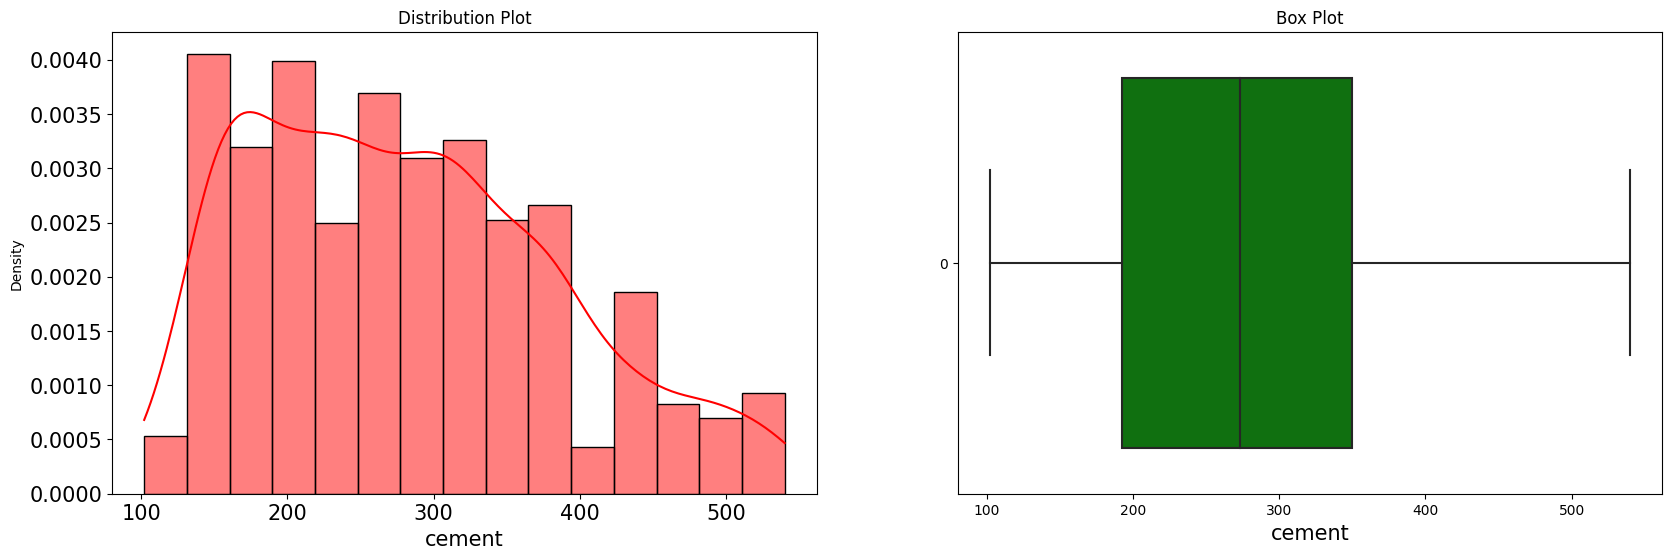

In [ ]:
#cement
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['cement'],ax=ax1, kde=True, stat="density", color="r")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('cement', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['cement'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('cement', fontsize=15)


Text(0.5, 0, 'slag')

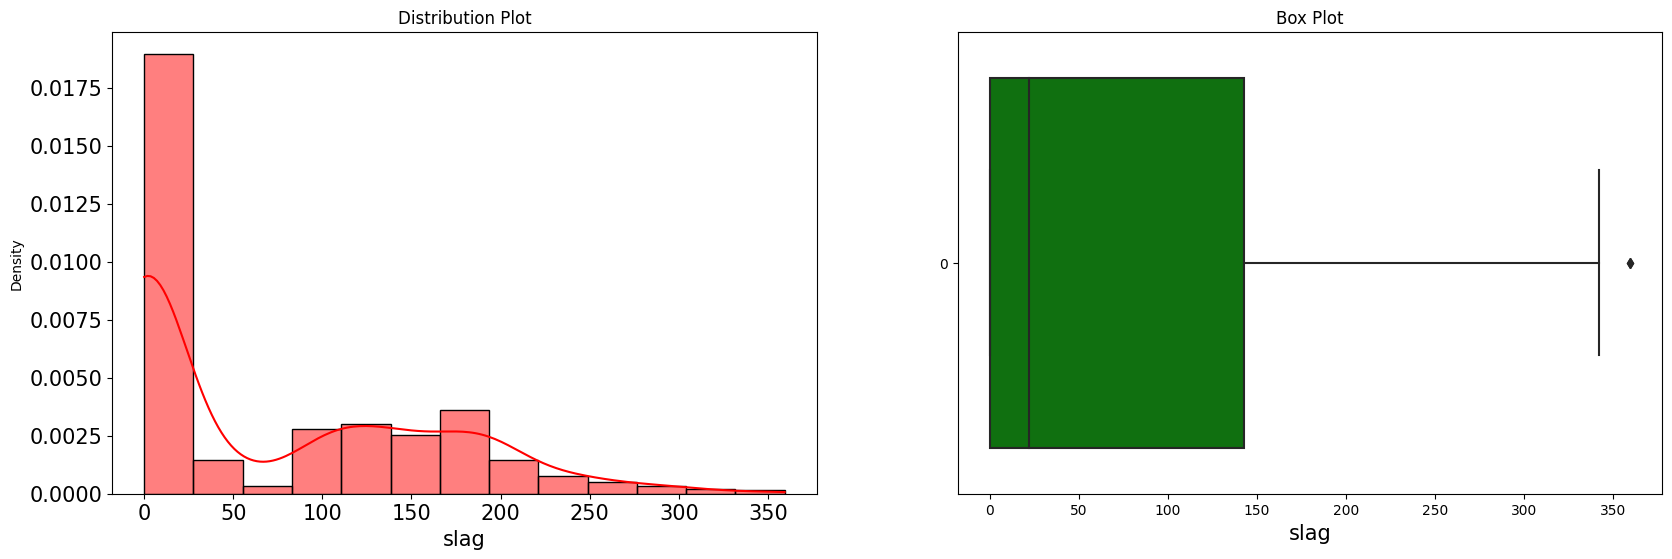

In [ ]:
#Slag
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['slag'],ax=ax1, kde=True, stat="density", color="r")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('slag', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['slag'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('slag', fontsize=15)


Text(0.5, 0, 'ash')

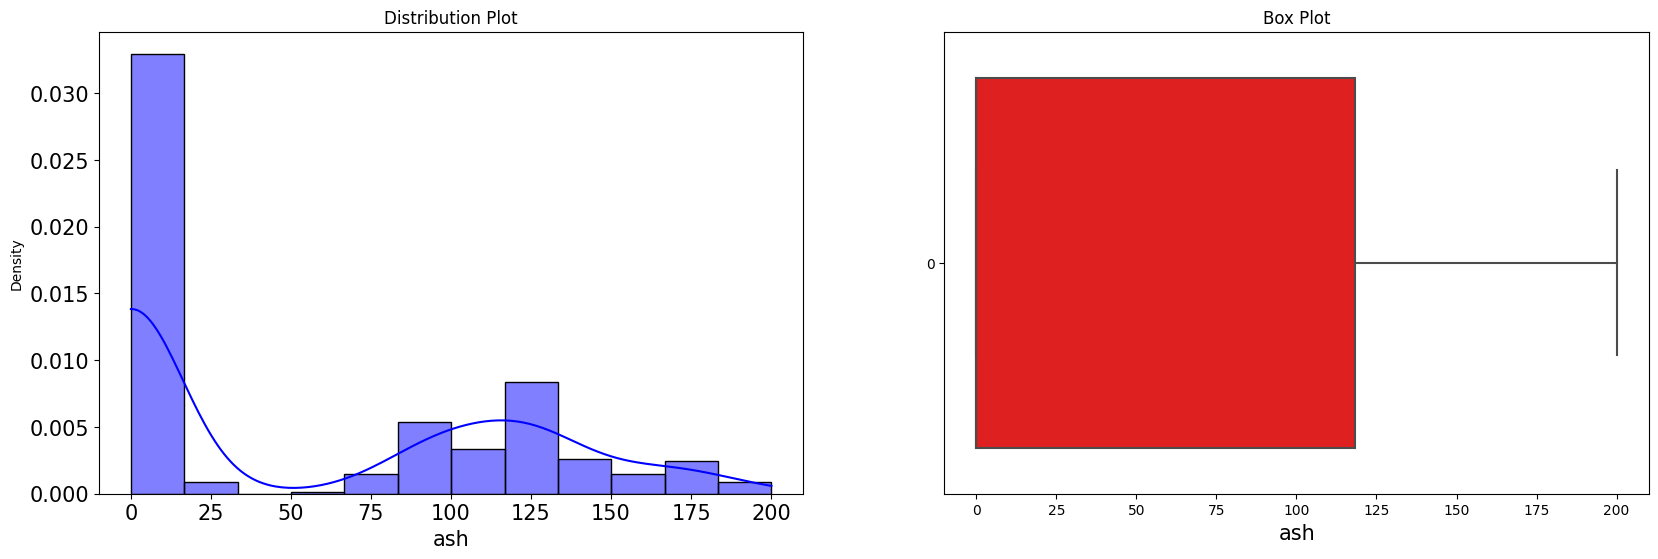

In [ ]:
# Ash

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['ash'],ax=ax1, kde=True, stat="density", color="b")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('ash', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['ash'],ax=ax2, color="r", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('ash', fontsize=15)


Text(0.5, 0, 'water')

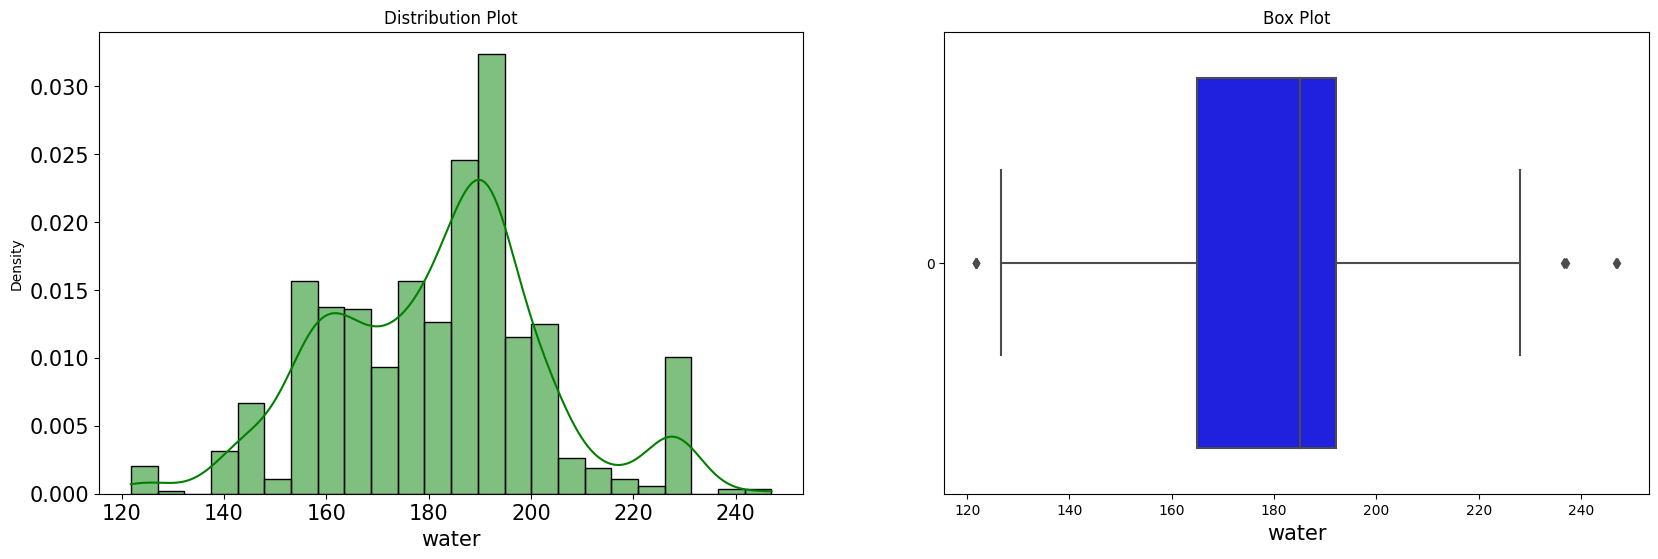

In [ ]:
#Water

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['water'],ax=ax1, kde=True, stat="density", color="g")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('water', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['water'],ax=ax2, color="b", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('water', fontsize=15)


**Inference: There are more outliers in water. It is better to check the number of outliers**

In [ ]:
outlier_columns = []

Q1 =  df['water'].quantile(0.25) # 1º Quartile
Q3 =  df['water'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_water = Q1 - 1.5 * IQR   # lower bound 
UTV_water = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('water <',LTV_water ,'and >',UTV_water, ' are outliers')
print('Numerber of outliers in water column below the lower whisker =', df[df['water'] < (Q1-(1.5*IQR))]['water'].count())
print('Numerber of outliers in water column above the upper whisker =', df[df['water'] > (Q3+(1.5*IQR))]['water'].count())

# storing column name and upper-lower bound value where outliers are presense 
outlier_columns.append('water')
upperLowerBound_Disct = {'water':UTV_water}

Interquartile range =  27.099999999999994
water < 124.25000000000001 and > 232.64999999999998  are outliers
Numerber of outliers in water column below the lower whisker = 5
Numerber of outliers in water column above the upper whisker = 4


Text(0.5, 0, 'superplastic')

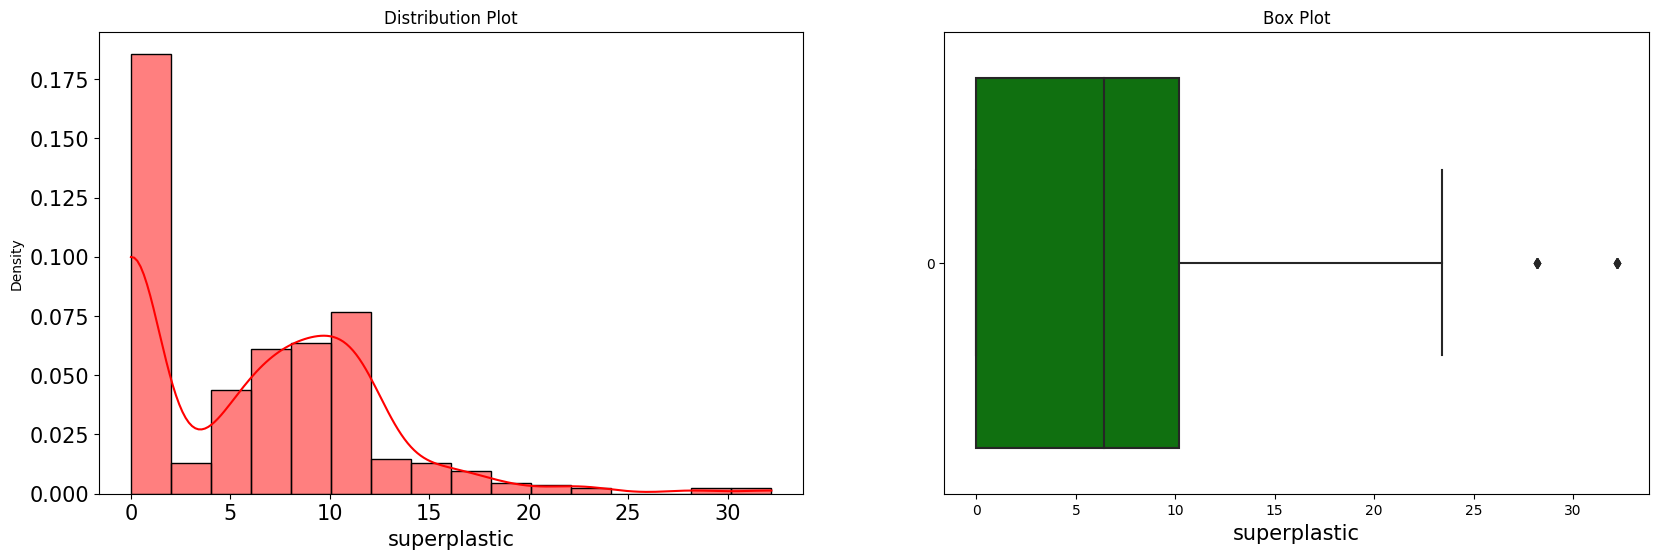

In [ ]:
#superplastic

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['superplastic'],ax=ax1, kde=True, stat="density", color="r")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('superplastic', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['superplastic'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('superplastic', fontsize=15)

**Inference: There are more outliers and skewness towards right side is observed more in the superplastic feature. It is better to check the number of outliers**

In [ ]:
Q1 =  df['superplastic'].quantile(0.25) # 1º Quartile
Q3 =  df['superplastic'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_superplastic = Q1 - 1.5 * IQR   # lower bound 
UTV_superplastic = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('superplastic <',LTV_superplastic ,'and >',UTV_superplastic, ' are outliers')
print('Numerber of outliers in superplastic column below the lower whisker =', df[df['superplastic'] < (Q1-(1.5*IQR))]['superplastic'].count())
print('Numerber of outliers in superplastic column above the upper whisker =', df[df['superplastic'] > (Q3+(1.5*IQR))]['superplastic'].count())

# storing column name and upper-lower bound value where outliers are presense
outlier_columns.append('superplastic')
upperLowerBound_Disct['superplastic'] = UTV_superplastic

Interquartile range =  10.2
superplastic < -15.299999999999999 and > 25.5  are outliers
Numerber of outliers in superplastic column below the lower whisker = 0
Numerber of outliers in superplastic column above the upper whisker = 10


Text(0.5, 0, 'coarseagg')

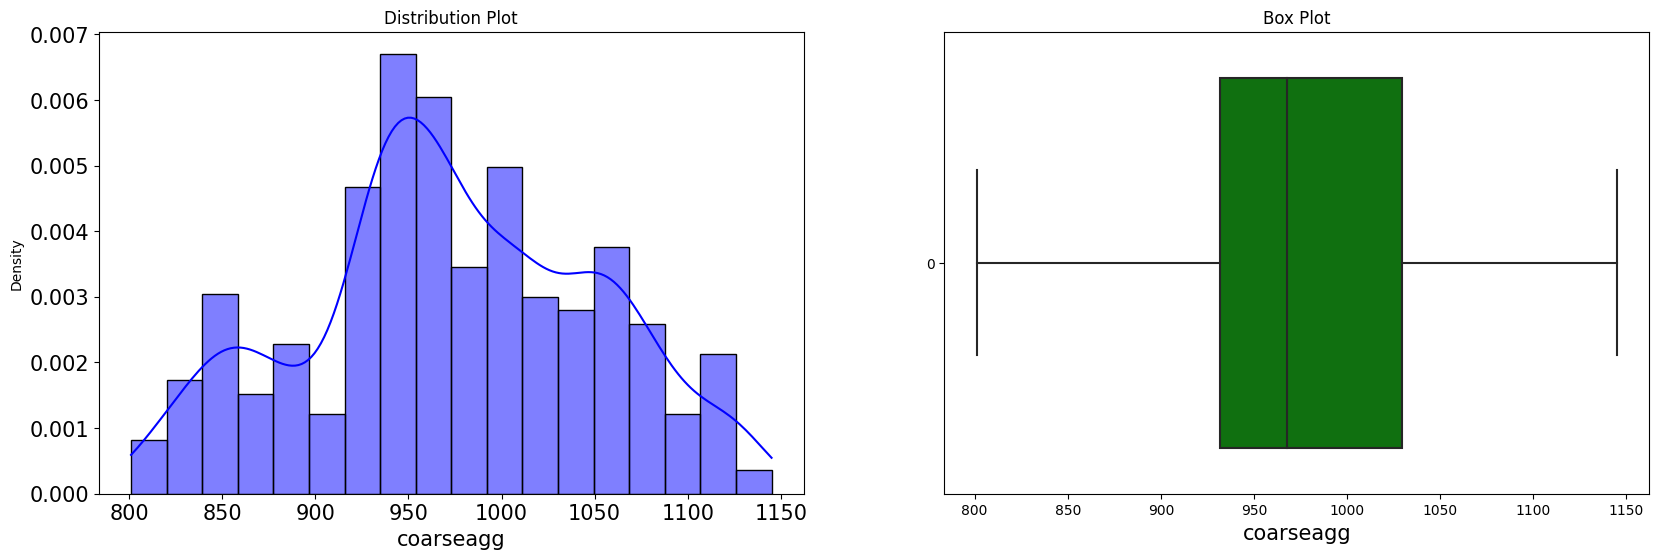

In [ ]:
#coarseagg

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['coarseagg'],ax=ax1, kde=True, stat="density", color="b")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('coarseagg', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['coarseagg'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('coarseagg', fontsize=15)

**Inference: Insight : From the box plot we can see that there are no outliers in coarseagg feature and there is a right skewness because long tail is at right side which infers mean > median**

Text(0.5, 0, 'fineagg')

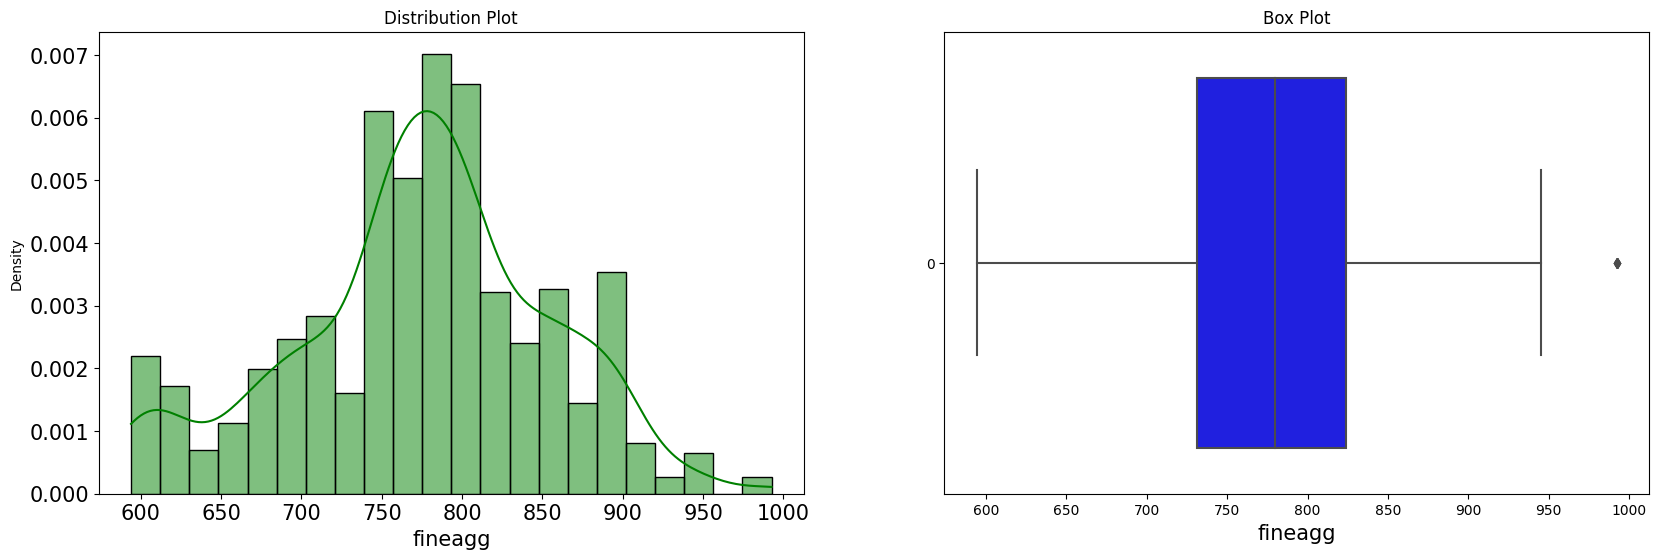

In [ ]:
#fineagg

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['fineagg'],ax=ax1, kde=True, stat="density", color="g")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('fineagg', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['fineagg'],ax=ax2, color="b", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('fineagg', fontsize=15)

**Inference:  From the box plot we can see that there are few outliers in Fineagg feature and there are two peaks in distribution plot and there is right skewness because long tail is at right side.**

Text(0.5, 0, 'age')

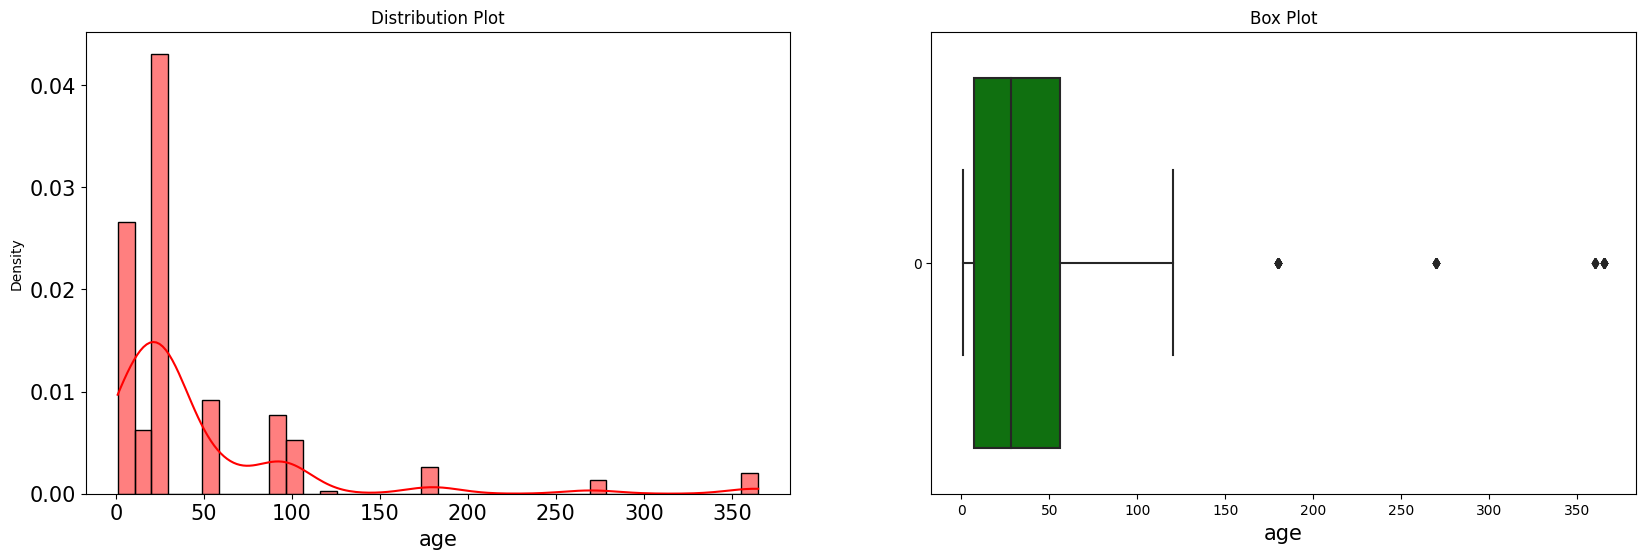

In [ ]:
#age
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['age'],ax=ax1, kde=True, stat="density", color="r")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('age', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['age'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('age', fontsize=15)

**Inference: From the box we can see that there are many outliers in Age feature and there are many peaks in distribution plot and there is left skewness because long tail is at left side which infers mean < median.**

In [ ]:
Q1 =  df['age'].quantile(0.25) # 1º Quartile
Q3 =  df['age'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_age = Q1 - 1.5 * IQR   # lower bound 
UTV_age = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('age <',LTV_age ,'and >',UTV_age, ' are outliers')
print('Numerber of outliers in age column below the lower whisker =', df[df['age'] < (Q1-(1.5*IQR))]['age'].count())
print('Numerber of outliers in age column above the upper whisker =', df[df['age'] > (Q3+(1.5*IQR))]['age'].count())

# storing column name and upper-lower bound value where outliers are presense
outlier_columns.append('age')
upperLowerBound_Disct['age'] = UTV_age

Interquartile range =  49.0
age < -66.5 and > 129.5  are outliers
Numerber of outliers in age column below the lower whisker = 0
Numerber of outliers in age column above the upper whisker = 59


Text(0.5, 0, 'strength')

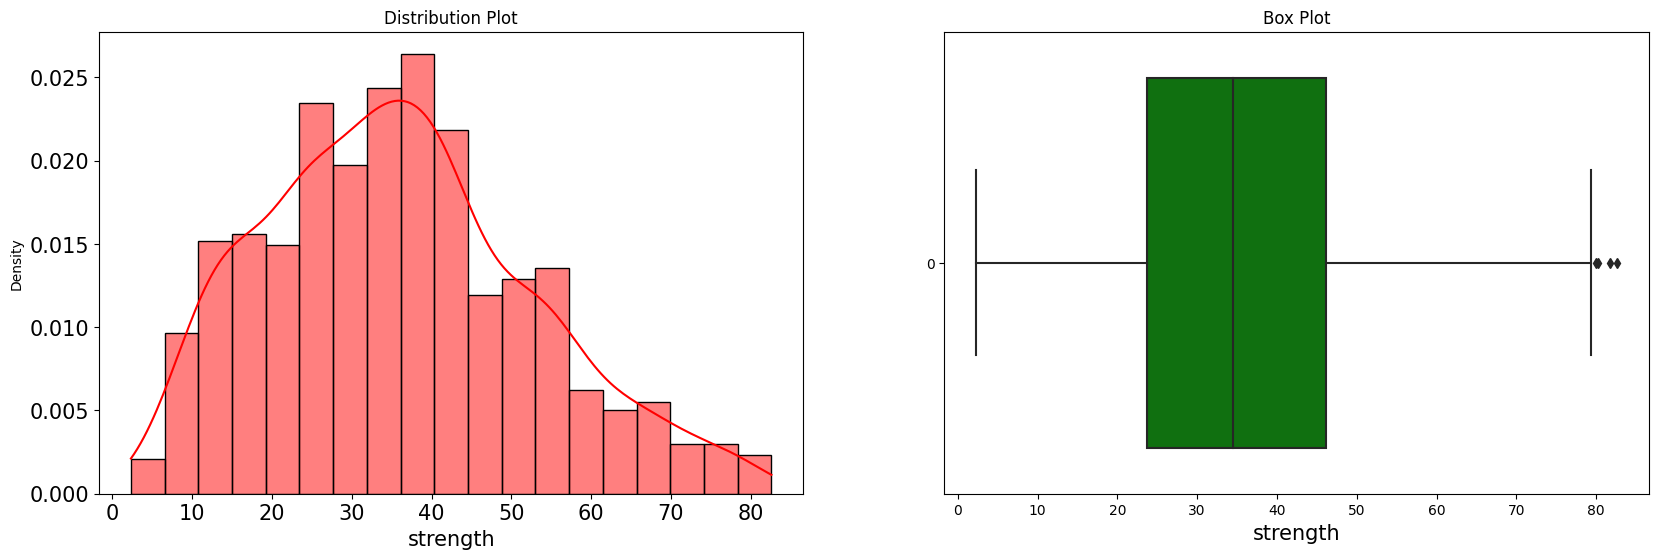

In [ ]:
#strength

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.histplot(df['strength'],ax=ax1, kde=True, stat="density", color="r")
ax1.tick_params(labelsize=15)
ax1.set_xlabel('strength', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(df['strength'],ax=ax2, color="g", orient="h")
ax2.set_title("Box Plot")
ax2.set_xlabel('strength', fontsize=15)

**Inference : From the box plot we can see that there are no outliers in strength column and there are two peaks in distribution plot and there is right skewness because long tail is at right side inferring mean > median**

 **There are outliers in the current dataset.
There are multiple ways like min-max scaling, standardization scaling to deal with outliers but we can try to analyze the median/mean, or drop the outliers.
In this notebook we can replace the outliers with median becase if we drop the data there might be some issues with loss of data.**


In [ ]:
print('These are the columns which have outliers : \n\n',outlier_columns)
print('\n\n',upperLowerBound_Disct)

These are the columns which have outliers : 

 ['water', 'superplastic', 'age']


 {'water': 232.64999999999998, 'superplastic': 25.5, 'age': 129.5}


In [ ]:
df_new = df.copy()

<Axes: >

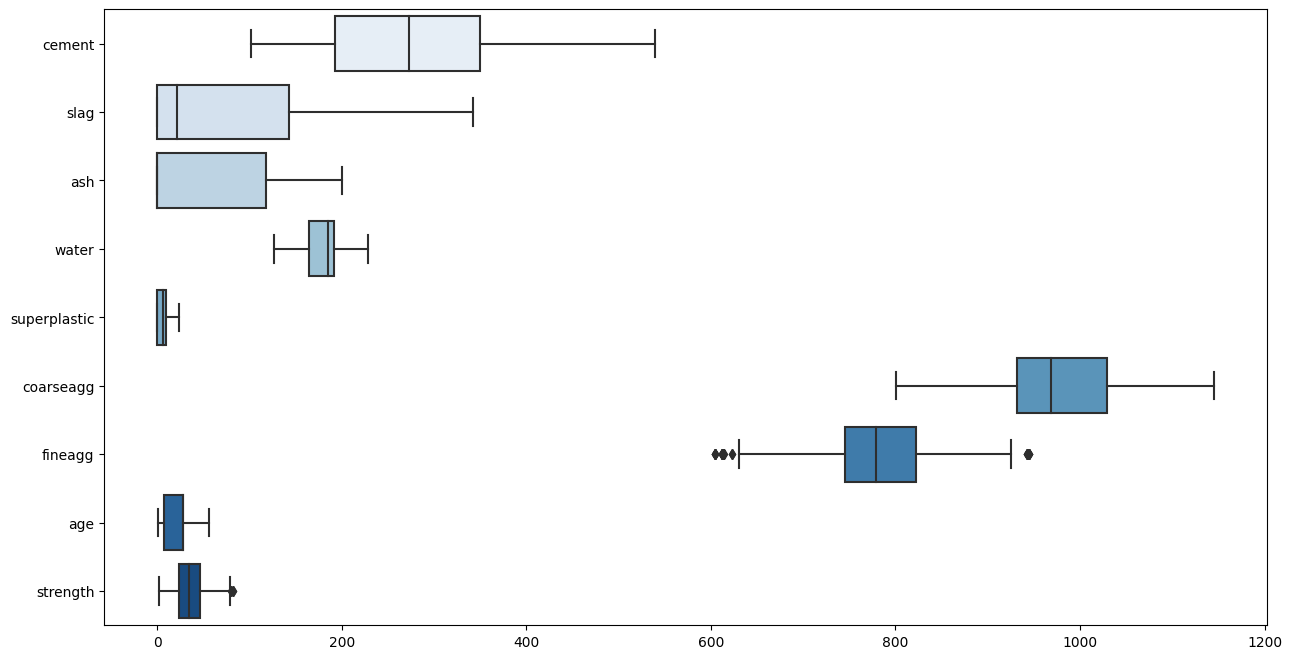

In [ ]:
for col_name in df_new.columns[:-1]:
    q1 = df_new[col_name].quantile(0.25)
    q3 = df_new[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    df_new.loc[(df_new[col_name] < low) | (df_new[col_name] > high), col_name] = df_new[col_name].median()
plt.figure(figsize=(15,8))
sns.boxplot(data=df_new, orient="h", palette="Blues", dodge=False)

**Inference after fixing outliers : The boxplot shows that most of the outliers are replaced with their median. Most of the outliers are removed by replacing it with median value.**

In [ ]:
df_new.shape

(1030, 9)

In [ ]:
df_new.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275046 -0.397467 -0.091614      0.013336  -0.109349   
slag         -0.275046  1.000000 -0.320468  0.098880      0.061195  -0.283882   
ash          -0.397467 -0.320468  1.000000 -0.248011      0.447492  -0.009961   
water        -0.091614  0.098880 -0.248011  1.000000     -0.658056  -0.156928   
superplastic  0.013336  0.061195  0.447492 -0.658056      1.000000  -0.224503   
coarseagg    -0.109349 -0.283882 -0.009961 -0.156928     -0.224503   1.000000   
fineagg      -0.195751 -0.279763  0.036516 -0.295604      0.088840  -0.214815   
age          -0.031151 -0.012265  0.154224 -0.054536      0.178058  -0.065762   
strength      0.497832  0.137800 -0.105755 -0.307711      0.346260  -0.164935   

               fineagg       age  strength  
cement       -0.195751 -0.031151  0.497832  
slag         -0.279763 -0.012265  0.137800  
ash           0.036516  0.154224 -0.105755  
water        -0.295604 -0.054536 -0.307711  
superplastic  0.088840  0.178058  0.346260  
coarseagg    -0.214815 -0.065762 -0.164935  
fineagg       1.000000 -0.011856 -0.186879  
age          -0.011856  1.000000  0.537951  
strength     -0.186879  0.537951  1.000000

<Axes: title={'center': 'Correlation of Attributes'}>

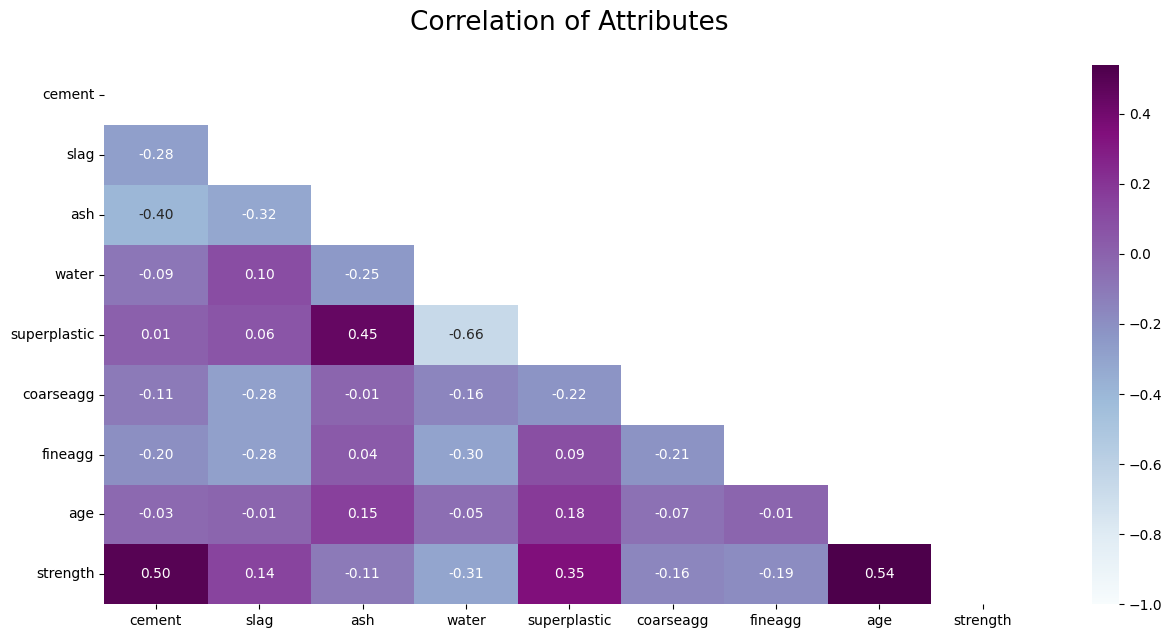

In [ ]:
mask = np.zeros_like(df_new.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df_new.corr(),vmin=-1, cmap='BuPu',annot=True,  mask=mask, fmt='.2f')

Inference: From above correlation matrix we can see that there are many features which are correlated with each other. the main purpose of this correalation matrix is to find the correlation between the different features. The features ash and cement are having correlation of -0.40. superplastic and water are having corelation of -0.66 . Cement has the highest correlation with the area of concrete_compressive_strength which is a positive correlation and followed by 'superplasticizer', which is also a positive correlation, and 'ash' has the least correlation.

# **KMeans Clustering**

In [ ]:
cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0             2    2.631260e+07
1             3    2.004594e+07
2             4    1.740693e+07
3             5    1.559008e+07

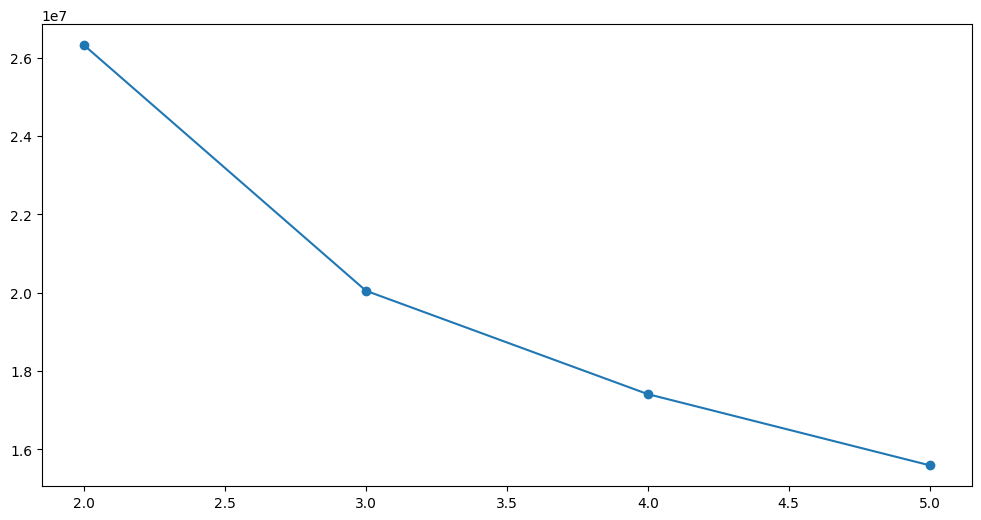

In [ ]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df_new)

prediction=cluster.predict(df_new)
df_new["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

concrete_df_new_copy = df_new.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids = cluster.cluster_centers_
centroids

array([[ 222.4558209 ,   11.7641791 ,  103.65522388,  174.18029851,
           7.13343284, 1018.90537313,  813.80985075,   24.86865672,
          29.65146269],
       [ 224.20994318,  174.48465909,   33.884375  ,  187.91505682,
           5.32017045,  943.28835227,  753.50681818,   23.57670455,
          35.58485795],
       [ 396.96297376,   29.38279883,   26.71195335,  182.52536443,
           5.51137026,  958.41311953,  767.99912536,   22.85714286,
          42.07985423]])

Inference: From the array above we can see that all three clusters are at same level


**Standardization of Independent Variables**

In [ ]:
XScaled = df_new.apply(zscore)
XScaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.339017  1.625902 -0.847144  1.060879     -1.091166  -0.014398 -0.407097   
1 -1.074790 -0.363717  1.096078 -1.134020      0.881615   1.388141  0.252365   
2 -0.298384 -0.858192  0.648965  0.279067     -0.086509  -0.206121  1.151001   
3 -0.145209  0.477594 -0.847144  2.250592     -1.091166  -0.526517 -1.492373   
4 -1.209776  1.290784 -0.847144  0.565570      0.571085   0.958372 -1.123241   

        age  strength     GROUP  
0  0.300203 -0.355018 -0.009574  
1 -0.690398 -0.737108 -1.242178  
2  0.300203 -0.395144 -1.242178  
3  0.300203  0.600806 -0.009574  
4  0.300203 -1.049727 -0.009574

<Axes: >

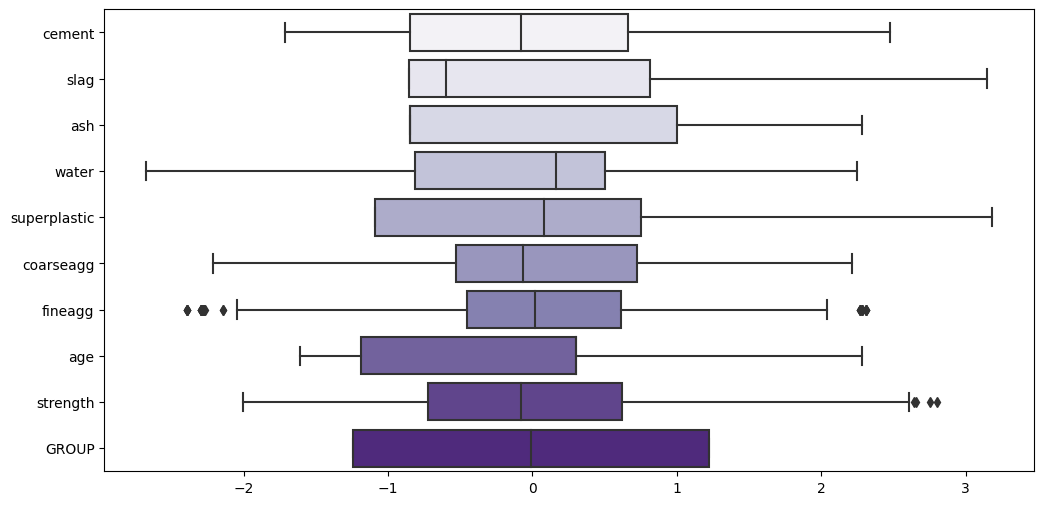

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=XScaled, orient="h", palette="Purples", dodge=False)

**Separating Independent and Dependent Variables**

In [ ]:
y_set = XScaled[['strength']]
X_set = XScaled.drop(labels= "strength" , axis = 1)

We need to separate our dataset to three parts:

1.   Training Set
2.   Validation Set
3.   Testing set




In [ ]:
y_set = XScaled[['strength']]
X_set = XScaled.drop(labels= "strength" , axis = 1)

# data spliting using 80:20 train test data ratio and randon seeding 7
X_model_train, X_test, y_model_train, y_test = train_test_split(X_set, y_set, test_size=0.20, random_state=7)

In [ ]:
print('---------------------- Data----------------------------- \n')
print('x train data {}'.format(X_model_train.shape))
print('y train data {}'.format(y_model_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

---------------------- Data----------------------------- 

x train data (824, 9)
y train data (824, 1)
x test data  (206, 9)
y test data  (206, 1)


In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_model_train, y_model_train, test_size=0.30, random_state=7)

# **Model**

In [ ]:
# Defining the kFold function for the cross validation
n_split = 10
randon_state = 7
kfold = KFold(n_split, random_state = randon_state, shuffle=True)
linear_model = []
linear_model_score = []
linear_model_RMSE = []
linear_model_R_2 = []
Model = []
RMSE = []
R_sq = []

# **Linear Regression**

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
linear_model.append('Linear Regression')
# coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

lr_score = regression_model.score(X_validate, y_validate)
linear_model_score.append(lr_score)
print("Linear Regression Model Score:",lr_score)

lr_rmse = np.sqrt((-1) * cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Linear Regression Model RMSE :", lr_rmse)

linear_model_RMSE.append(lr_rmse)

lr_r2 = cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Linear Regression Model R-Square Value :",lr_r2)

The coefficient for cement is 0.7111925871671474
The coefficient for slag is 0.39856637742049916
The coefficient for ash is 0.13057925893222166
The coefficient for water is -0.184956037893621
The coefficient for superplastic is 0.02871069427305839
The coefficient for coarseagg is 0.026498518702310174
The coefficient for fineagg is -0.02159347531374531
The coefficient for age is 0.5528333433104005
The coefficient for GROUP is -0.08604239082084802
The intercept for our model is 0.0046904850882084955
Linear Regression Model Score: 0.7240482832729365
Linear Regression Model RMSE : 0.5353820352604481
Linear Regression Model R-Square Value : 0.6991527036882017


#**Polynomial regression - Degree2**

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_validate)
print("Shape", X_train_.shape)
linear_model.append('Polynomial Features - 2D')

poly_clf = LinearRegression()

poly_clf.fit(X_train_, y_train)

pf_score = poly_clf.score(X_test_, y_validate)
print("2D Polynomial Model Score:",pf_score)
linear_model_score.append(pf_score)

pf_rmse = np.sqrt((-1) * cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("2D Polynomial Model RMSE :", pf_rmse)
linear_model_RMSE.append(pf_rmse)

pf_r2 = cross_val_score(poly_clf, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
linear_model_R_2.append(pf_r2)
print("2D Polynomial Model R-Square Value :", pf_r2)

Shape (576, 46)
2D Polynomial Model Score: 0.8007297380134545
2D Polynomial Model RMSE : 0.49989740290784845
2D Polynomial Model R-Square Value : 0.7441539356804375


#**Polynomial regression - Degree3**

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train__ = poly.fit_transform(X_train)
X_test__ = poly.fit_transform(X_validate)
print("Shape", X_train__.shape)
linear_model.append('Polynomial Features - 3D')

poly_clf_3d = LinearRegression()

poly_clf_3d.fit(X_train__, y_train)

pf3_score = poly_clf_3d.score(X_test__, y_validate)
print("3D Polynomial Model Score:",pf3_score)
linear_model_score.append(pf3_score)

pf3_rmse = np.sqrt((-1) * cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("3D Polynomial Model RMSE :",pf3_rmse)
linear_model_RMSE.append(pf3_rmse)

pf3_r2 = cross_val_score(poly_clf_3d, X_train__, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("3D Polynomial Model R-Square Value :",pf3_r2)
linear_model_R_2.append(pf3_r2)

Shape (576, 130)
3D Polynomial Model Score: 0.7783503094771402
3D Polynomial Model RMSE : 0.5365623089688237
3D Polynomial Model R-Square Value : 0.7042045615757834


**Ridge**

In [ ]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
linear_model.append('Ridge - with general data')
print ("Coefficients of the Ridge model",ridge.coef_)
rid_score = ridge.score(X_validate, y_validate)
linear_model_score.append(rid_score)
print("Ridge Model Score:", rid_score)
rig_rmse = np.sqrt((-1) * cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Ridge Model RMSE :", rig_rmse)
linear_model_RMSE.append(rig_rmse)
rid_r2 = cross_val_score(ridge, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Ridge Model R-Square Value :",rid_r2)
linear_model_R_2.append(rid_r2)


ridge_pf2 = Ridge(alpha=.3)
ridge_pf2.fit(X_train_,y_train)
linear_model.append('Ridge - with 2d Polynomial features')
print("Coefficients of the Ridge Model - with 2d Polynomial features")
print (ridge_pf2.coef_)
rid_score = ridge_pf2.score(X_test_, y_validate)
linear_model_score.append(rid_score)
print("Ridge Model (2d Polynomial features) Score:",rid_score)
rig_rmse = np.sqrt((-1) * cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Ridge Model (2d Polynomial features) RMSE :", rig_rmse)
linear_model_RMSE.append(rig_rmse)
rid_r2 = cross_val_score(ridge_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Ridge Model (2d Polynomial features) R-Square Value :",rid_r2)
linear_model_R_2.append(rid_r2)

Coefficients of the Ridge model [[ 0.70850955  0.39618854  0.12859377 -0.18582294  0.02918311  0.02526393
  -0.02314609  0.5525364  -0.08555384]]
Ridge Model Score: 0.7239741653881906
Ridge Model RMSE : 0.5353666534783584
Ridge Model R-Square Value : 0.6991901988551568
Coefficients of the Ridge Model - with 2d Polynomial features
[[ 0.          0.81345193  0.50960885  0.23583034 -0.15490306 -0.01423531
   0.05173828  0.02749995  0.58469349 -0.07139364  0.02693001  0.0028532
  -0.14754162  0.03612805  0.04143788  0.01107825 -0.16722109 -0.17318085
   0.09039998 -0.1089571  -0.00971597  0.02227511  0.0849279  -0.07146594
  -0.04184252 -0.19011028 -0.12365471  0.02916663  0.09068839 -0.12655924
  -0.0407428  -0.02747122 -0.12261069 -0.08345924 -0.15244301 -0.06344904
  -0.02708255 -0.04183762 -0.08758255 -0.15840026 -0.01650157 -0.08097515
  -0.12303739 -0.18410506 -0.08095675  0.06125319]]
Ridge Model (2d Polynomial features) Score: 0.8010525338077735
Ridge Model (2d Polynomial features)

# **Lasso**

In [ ]:
lasso = Lasso(alpha=.3)
lasso.fit(X_train,y_train)
linear_model.append('Lasso - with general data')
print("Coefficients of the Lasso model")
print (lasso.coef_)
lasso_score = lasso.score(X_validate, y_validate)
linear_model_score.append(lasso_score)
print("Lasso Model Score:", lasso_score)
lasso_rmse = np.sqrt((-1) * cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Lasso Model RMSE :", lasso_rmse)
linear_model_RMSE.append(lasso_rmse)
lasso_r2 = cross_val_score(lasso, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Lasso Model R-Square Value :",lasso_r2)
linear_model_R_2.append(lasso_r2)

lasso_pf2 = Lasso(alpha=.3)
lasso_pf2.fit(X_train_,y_train)
linear_model.append('Lasso - with 2d Polynomial features')
print("Coefficients of the Lasso Model - with 2d Polynomial features")
print (lasso_pf2.coef_)
lasso_pf2_score = lasso_pf2.score(X_test_, y_validate)
linear_model_score.append(lasso_pf2_score)
print("Lasso Model (2d Polynomial features) Score:",lasso_pf2_score)
lasso_pf2_rmse = np.sqrt((-1) * cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Lasso Model (2d Polynomial features) RMSE :", lasso_pf2_rmse)
linear_model_RMSE.append(lasso_pf2_rmse)
lasso_pf2_r2 = cross_val_score(lasso_pf2, X_train_, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Lasso Model (2d Polynomial features) R-Square Value :", lasso_pf2_r2)
linear_model_R_2.append(lasso_pf2_r2)

Coefficients of the Lasso model
[ 0.209533    0.         -0.         -0.          0.00129043 -0.
 -0.          0.26846287  0.        ]
Lasso Model Score: 0.3761944330352823
Lasso Model RMSE : 0.7965359996652308
Lasso Model R-Square Value : 0.36274127906055015
Coefficients of the Lasso Model - with 2d Polynomial features
[ 0.          0.209533    0.         -0.         -0.          0.00129043
 -0.         -0.          0.26846287  0.          0.         -0.
 -0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          0.         -0.          0.
  0.          0.          0.          0.        ]
Lasso Model (2d Polynomial features) Score: 0.3761944330352823
Lasso Model (2d Polynomial features) RMSE : 0.7965359996652308
Lasso Model (2d Polynomial features) R-

# **Comparing Linear and polynomial features**

# **Random Forest Regressor**

In [ ]:
rfTree = RandomForestRegressor(n_estimators=100)
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)


rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:", rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)


rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9656475339159136
Random Forest Regressor Model Validation Set Score: 0.869877837236466
Random Forest Regressor Model RMSE : 0.4178713574029775
Random Forest Regressor Model R-Square Value : 0.8257146225261038


Trainng Score  Validation Score      RMSE  R Squared
0       0.965648          0.869878  0.417871   0.825715

In [ ]:
print("Random Forest Regressor Model Test Data Set Score:")
rfTree_test_score = rfTree.score(X_test, y_test)
print(rfTree_test_score)

Random Forest Regressor Model Test Data Set Score:
0.8473129425591686


# **Hyper-tuning Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(random_state = 7)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 55, 100]}


In [ ]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)

rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:",rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9066281471942204
Random Forest Regressor Model Validation Set Score: 0.8164973858287448
Random Forest Regressor Model RMSE : 0.4394906798815163
Random Forest Regressor Model R-Square Value : 0.8046083283656008


Trainng Score  Validation Score      RMSE  R Squared
0       0.906628          0.816497  0.439491   0.804608

In [ ]:
rfTree_test_score = rfTree.score(X_test, y_test)
print("Random Forest Regressor Model Test Data Set Score:", rfTree_test_score)


Random Forest Regressor Model Test Data Set Score: 0.8174895009878618


# **GridsearchCV**

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5,10],
    'n_estimators': np.arange(50, 71)
}
rfg = RandomForestRegressor(random_state = 7)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 52}

In [ ]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:", rfTree_train_score)

rfTree_score = rfTree.score(X_validate, y_validate)
print("Random Forest Regressor Model Validation Set Score:",rfTree_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'Validation Score': [rfTree_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.939691821595673
Random Forest Regressor Model Validation Set Score: 0.8428615725369759
Random Forest Regressor Model RMSE : 0.4203542382222632
Random Forest Regressor Model R-Square Value : 0.8216912383927042


Trainng Score  Validation Score      RMSE  R Squared
0       0.939692          0.842862  0.420354   0.821691

# **Comparing performances of all the models**

In [ ]:
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=kfold, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=kfold, scoring='r2').mean())
#Comment: Above function uses to append the cross validation scores of the algorithms.

In [ ]:
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor', 'Support Vector Regressor']
models = [LinearRegression(), Ridge(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=100), GradientBoostingRegressor(), 
          AdaBoostRegressor(), SVR(gamma= "auto")]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train, y_train.values.ravel())

In [ ]:
compare_model_df = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("BELOW ARE THE TRAINING SCORES: ")
compare_model_df

BELOW ARE THE TRAINING SCORES: 


Model      RMSE  R Squared
0            Linear Regression  0.535382   0.699153
1             Ridge Regression  0.535347   0.699259
2        K Neighbors Regressor  0.500818   0.739092
3      Decision Tree Regressor  0.519787   0.711925
4      Random Forest Regressor  0.419668   0.820573
5  Gradient Boosting Regressor  0.401676   0.836283
6           Adaboost Regressor  0.523115   0.727259
7     Support Vector Regressor  0.409467   0.828699

 **Inference:  Random Forest Regressor has the lowest Root Mean Square Error (RMSE) and Higest R Square value. it is he best model to predict the compressive strength of the concrete.**

**Final Findings:
From the differet ML algorithms for this particular dataset RandomForestRegressor is producing the good accuracy score.**